# 1. Установка и импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для отображения графиков в Jupyter Notebook
%matplotlib inline


# 2. Загрузка данных


In [ ]:
data = pd.read_csv('telecom_churn.csv')

print(data.head())

data.info()

print(data.isnull().sum())


  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

# 3. Анализ структуры данных

Проверьте основные статистические характеристики данных.

In [ ]:
print(data.describe())

for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} уникальных значений")


       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

# 4. Визуализация данных
## 4.1. Гистограммы
Используем метод hist() для анализа распределения признаков.

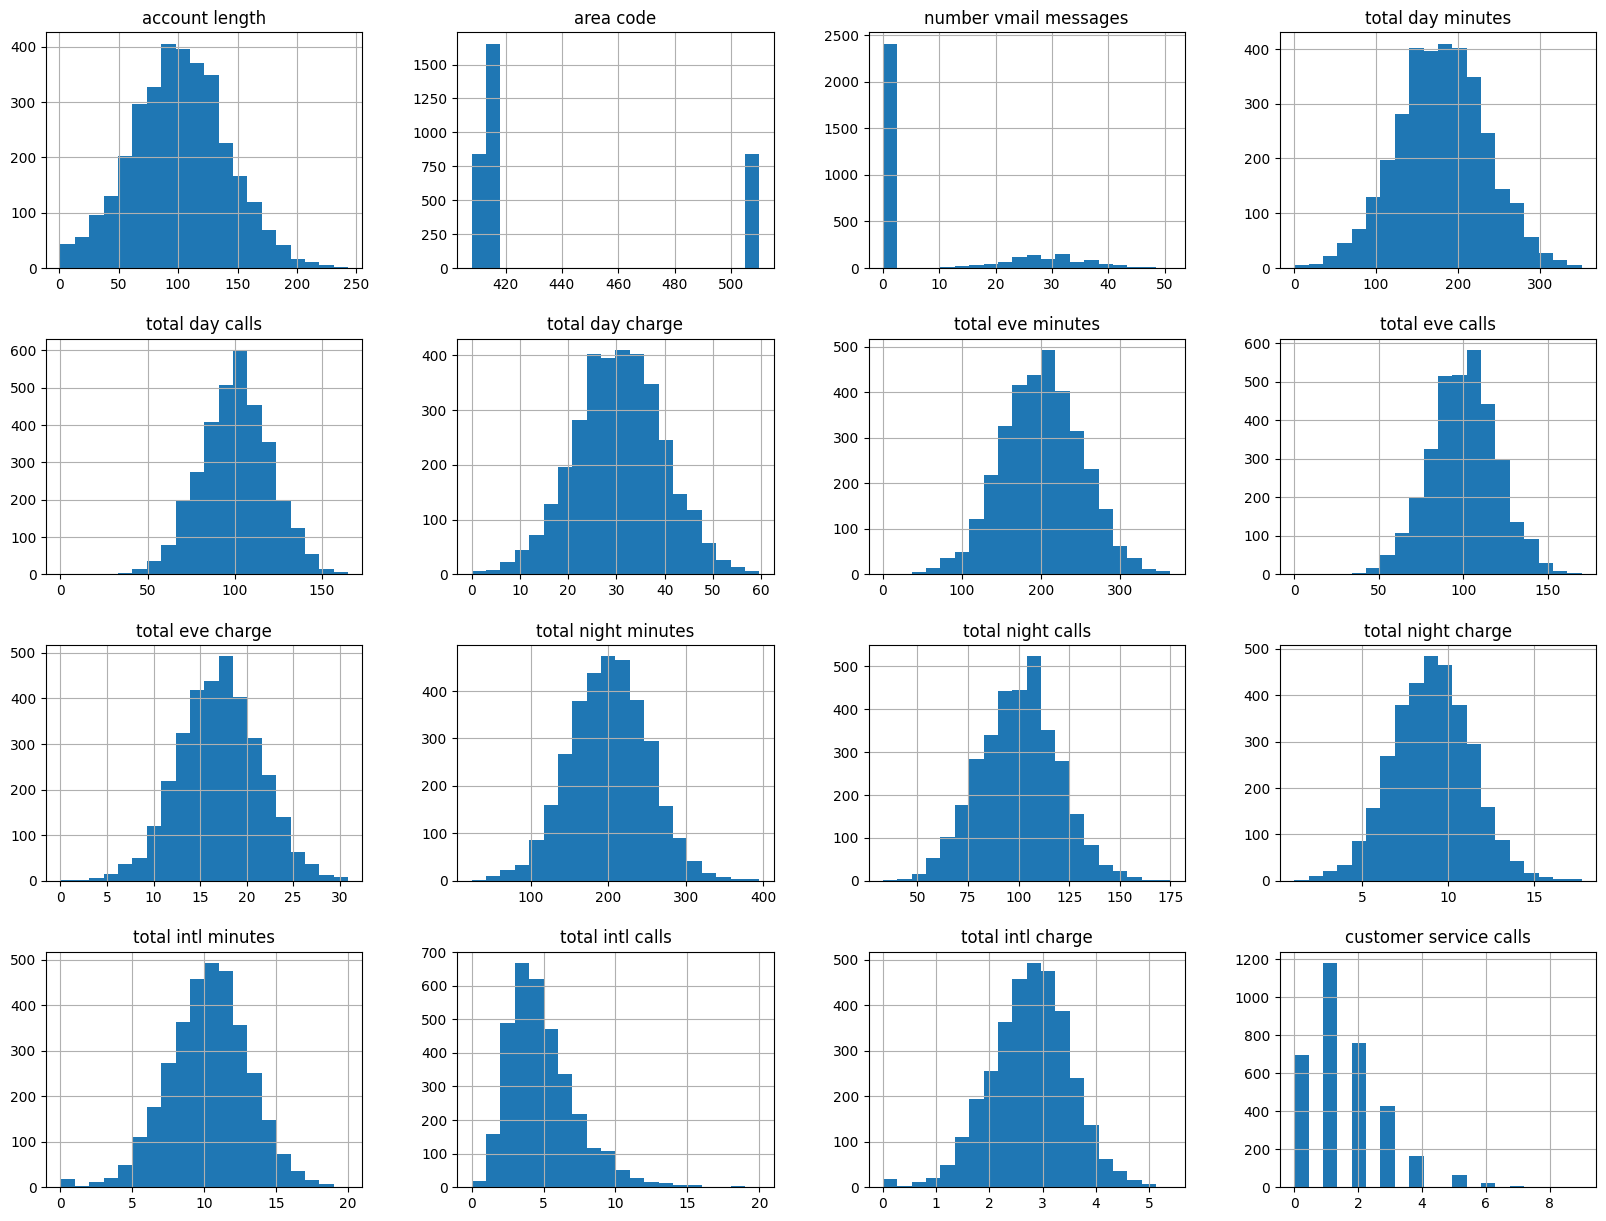

In [ ]:
data.hist(bins=20, figsize=(20, 15))
plt.show()


## 4.2. График "ящик с усами" (Boxplot)

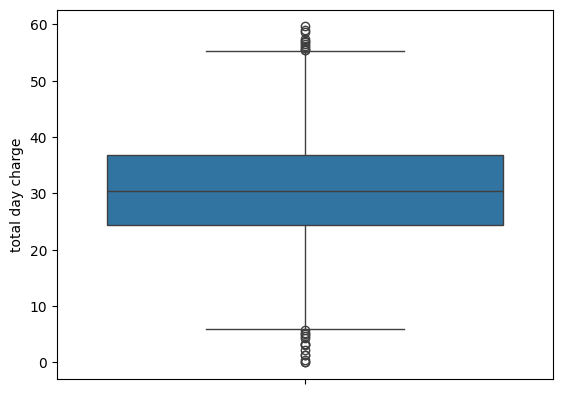

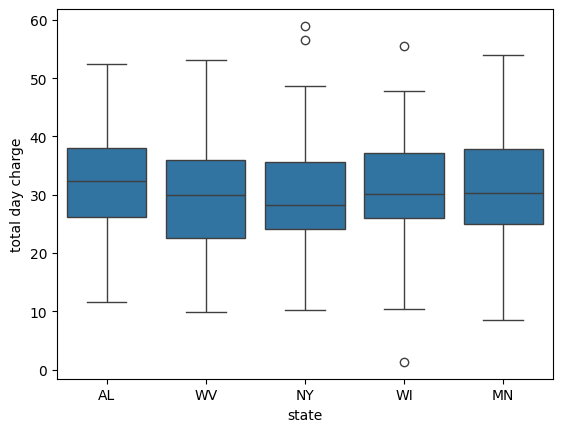

In [ ]:
sns.boxplot(y='total day charge', data=data)
plt.show()

top_states = data['state'].value_counts().head(5).index
sns.boxplot(x='state', y='total day charge', data=data[data['state'].isin(top_states)])
plt.show()

## 4.3. Графики распределений (Seaborn)

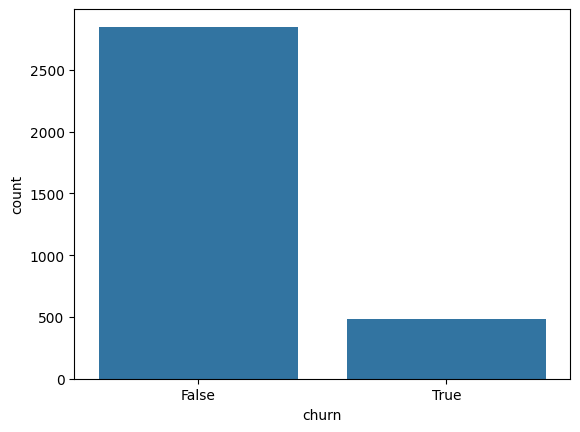

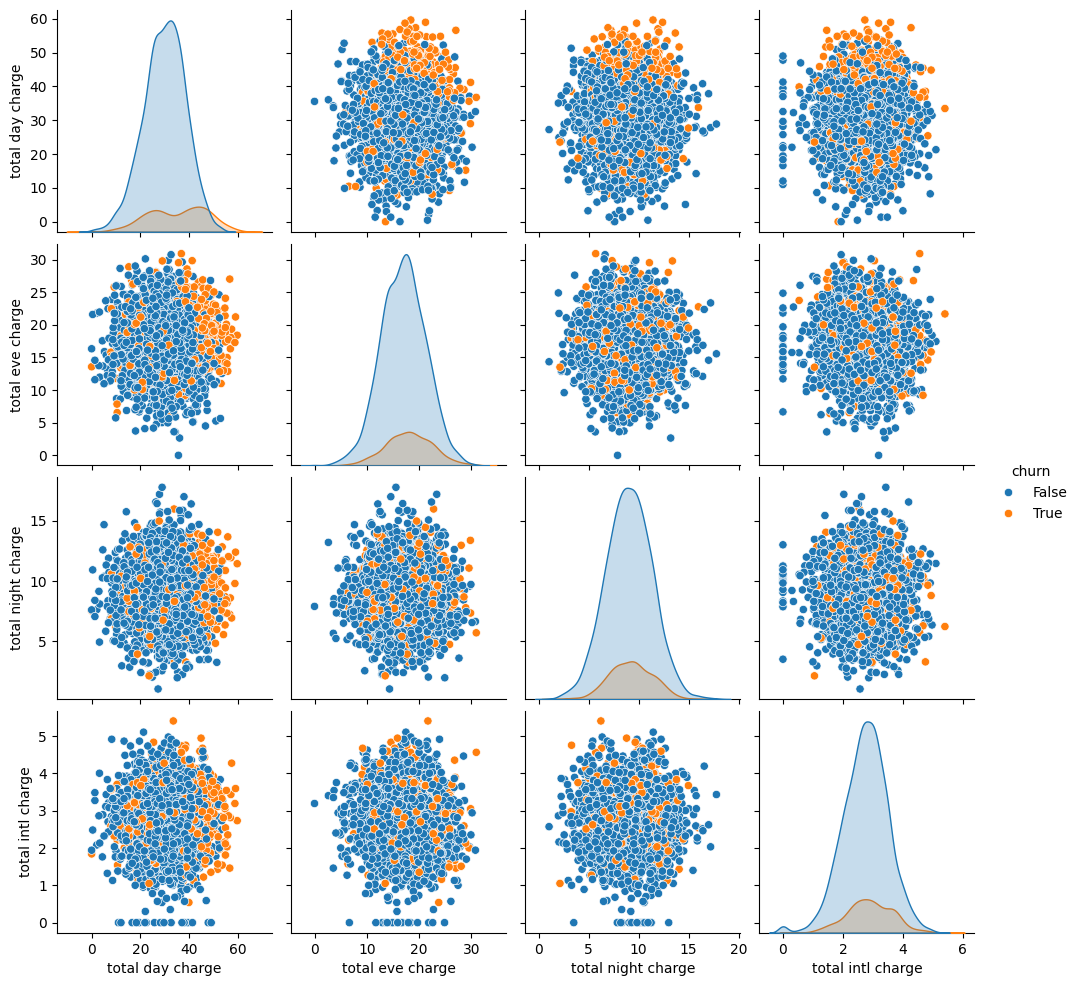

In [ ]:
# Распределение признака "Churn"
sns.countplot(x='churn', data=data)
plt.show()

# Попарное распределение с цветовым разделением по 'Churn'
sns.pairplot(data, hue='churn', vars=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
plt.show()


# 5. Корреляционный анализ
## 5.1. Вычисление корреляционной матрицы

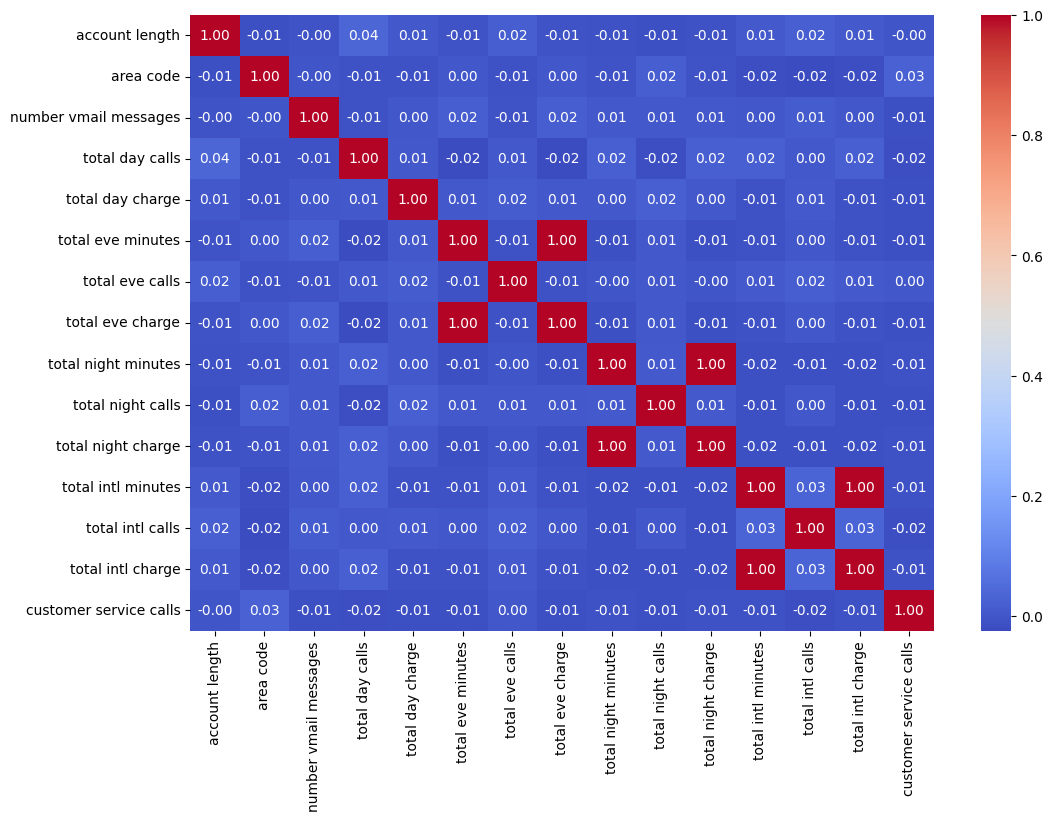

In [ ]:
# Выбираем только числовые столбцы
numeric_data = data.select_dtypes(include='number')

# Корреляционная матрица
corr_matrix = numeric_data.corr()

# Тепловая карта
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## 5.2. Удаление сильно коррелирующих признаков
Для удаления признаков с высокой корреляцией (например, выше 0.85):

In [ ]:
# Определение коррелирующих признаков
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr = [(col1, col2) for col1, col2 in corr_pairs.index if col1 != col2 and corr_pairs[(col1, col2)] > threshold]
print("Сильно коррелирующие пары:", high_corr)

# Удаление одной из пары сильно коррелирующих признаков
data = data.drop(['total day minutes'], axis=1)  # удалено после компиляции


Сильно коррелирующие пары: [('total eve charge', 'total eve minutes'), ('total eve minutes', 'total eve charge'), ('total night minutes', 'total night charge'), ('total night charge', 'total night minutes'), ('total intl minutes', 'total intl charge'), ('total intl charge', 'total intl minutes')]
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


# 6. Дополнительные графики
## 6.1. Scatter plot

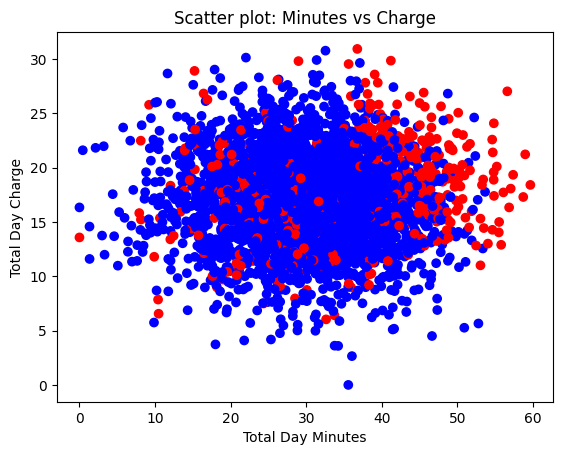

In [ ]:
# Scatter plot с учетом признака 'Churn'
plt.scatter(data['total day charge'], data['total eve charge'], c=data['churn'].map({True: 'red', False: 'blue'}))
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.title('Scatter plot: Minutes vs Charge')
plt.show()


# Индивидуальное задание

1. Проведите первичный анализ данных. Особое внимание следует уделить графическому представлению распрееделений признаков, визуализации взаимосвзей, позволяющие судить о наборе данных. Построение графиков желательно произвести по нескольким проекциям. При анализе данных использовать как можно более разнообразные типы графиков.


## Шаг 1: Импорт необходимых библиотек, загрузка данных

In [47]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Employee.csv', quotechar='"')

# Вывод первых 5 строк данных
print("Первые 5 строк данных:")
print(df.head())


Первые 5 строк данных:
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


## Шаг 2: Визуализация распределений числовых признаков

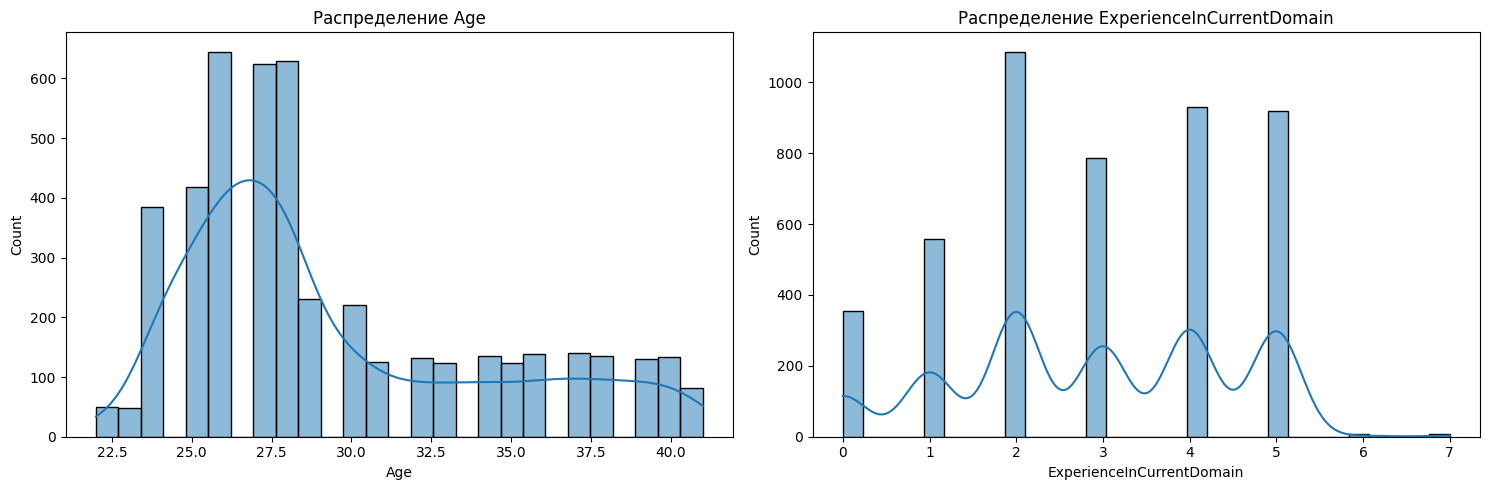

In [48]:
# Гистограммы для числовых признаков
numeric_columns = ['Age', 'ExperienceInCurrentDomain']

# Подготовим графики
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(15, 5))

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {column}')

plt.tight_layout()
plt.show()


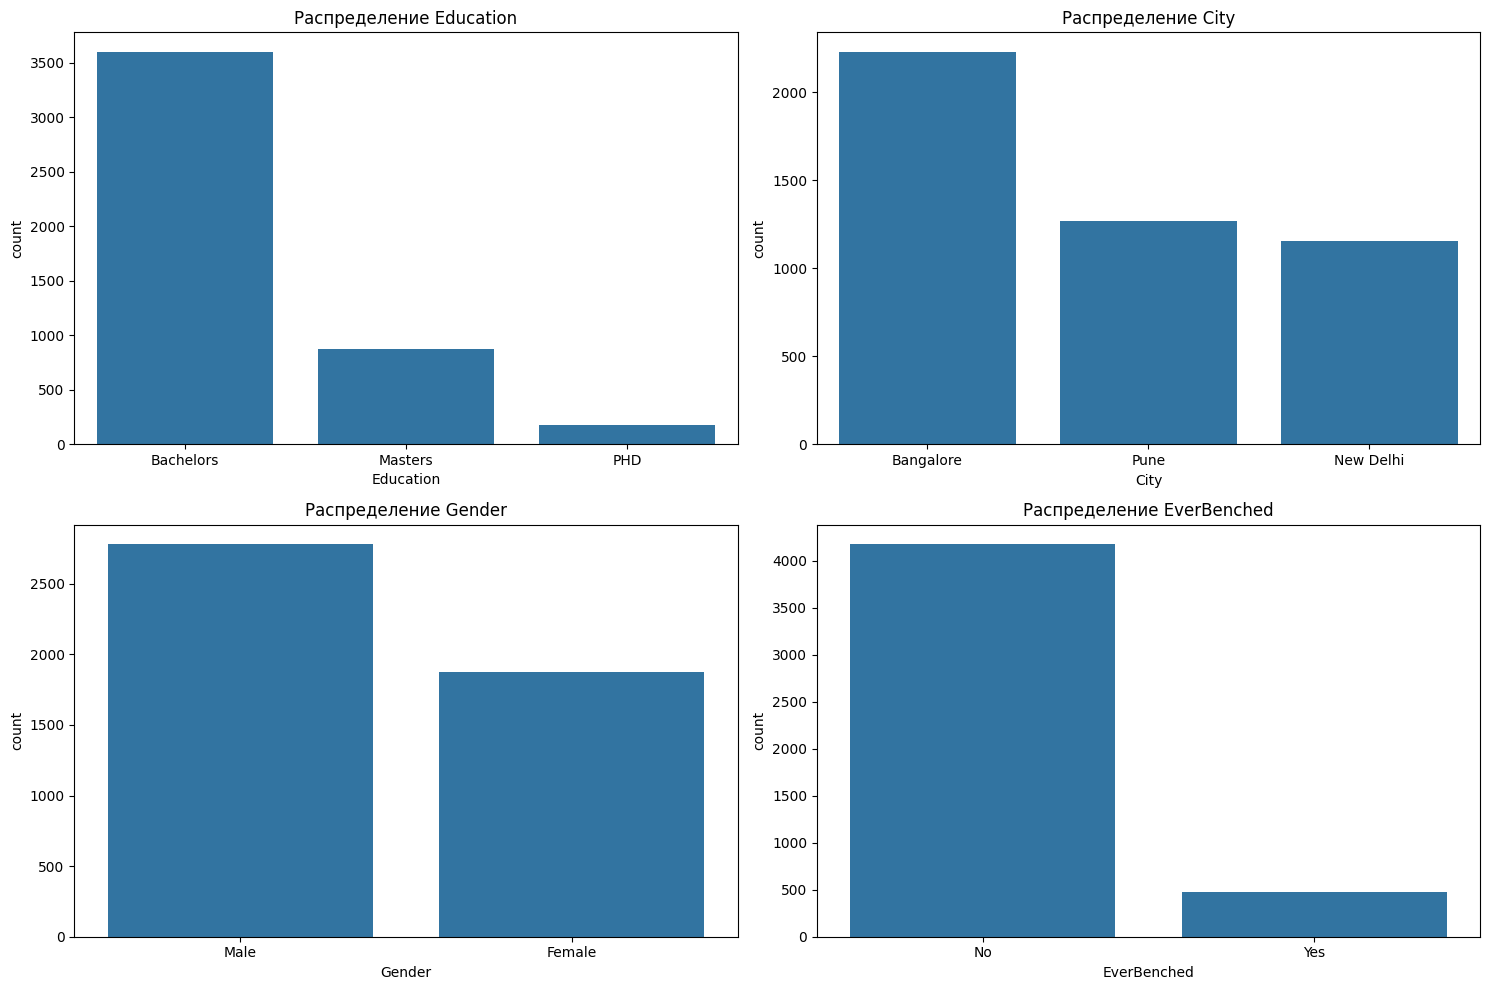

In [39]:
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

# Столбчатые диаграммы для категориальных признаков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    ax = axes[i//2, i%2]
    sns.countplot(x=df[column], ax=ax)
    ax.set_title(f'Распределение {column}')

plt.tight_layout()
plt.show()

## Шаг 3: Визуализация взаимосвязей между признаками


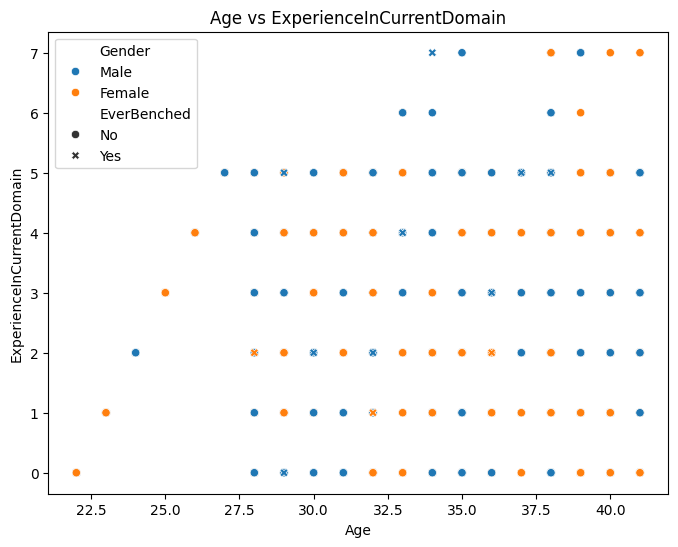

In [40]:
# График зависимостей между "Age" и "ExperienceInCurrentDomain"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='ExperienceInCurrentDomain', hue='Gender', style='EverBenched')
plt.title('Age vs ExperienceInCurrentDomain')
plt.show()

## Шаг 4: Визуализация взаимосвязей между категориальными признаками и зависимой переменной

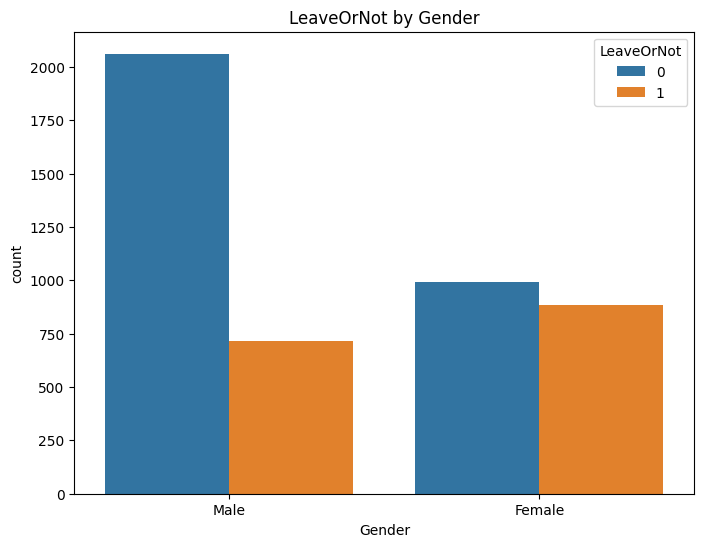

In [41]:
# Столбчатая диаграмма для "LeaveOrNot" по "Gender"
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='LeaveOrNot', data=df)
plt.title('LeaveOrNot by Gender')
plt.show()

## Шаг 5: Тепловая карта корреляций


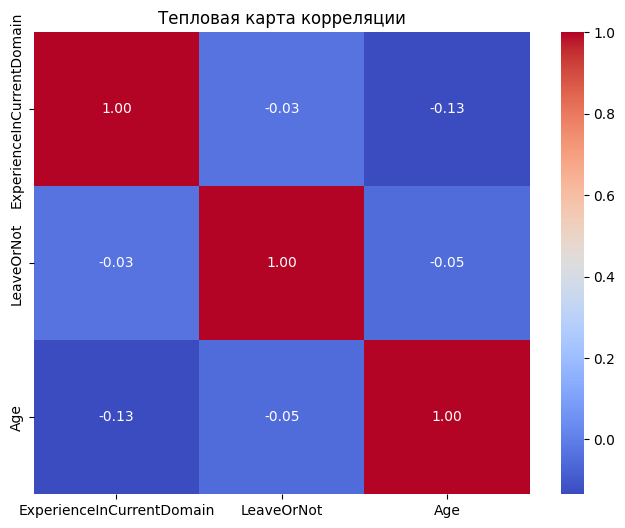

In [46]:
# Выбираем числовые признаки: JoiningYear, PaymentTier, Age
numeric_columns = ['ExperienceInCurrentDomain', 'LeaveOrNot', 'Age']

# Создаём матрицу корреляции для выбранных признаков
correlation_matrix = df[numeric_columns].corr()

# Тепловая карта для корреляции между числовыми признаками
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()


## Вывод

1. Чаще всего сотрудник проживает и имеет образование Бангалора
2. Женщины в компании немного чаще берут отпуск, в то время как мужчины чаще остаются на работе и не берут отпуск.
3. Корреляции между признаками ExperienceInCurrentDomain, LeaveOrNot и Age очень слабые, что указывает на отсутствие значимой зависимости между опытом сотрудников в текущей области, их возрастом и решением о том, брать ли отпуск. Все корреляции близки к нулю, что свидетельствует о том, что эти факторы не влияют друг на друга в значительной степени.